#Project 4 - Semi Supervised Learning & Model Evaluation

Ον/νο: Καρλάκη Μαρία ΑΕΜ: 244

#**Μέρος 1**

Βιβλιοθήκες

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import plot_tree

In [ ]:
df = pd.read_csv("wine-missing.csv")

In [ ]:
df.describe(include="all")

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,NaN,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,NaN,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,NaN,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,NaN,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,NaN,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000


Ερώτημα 1

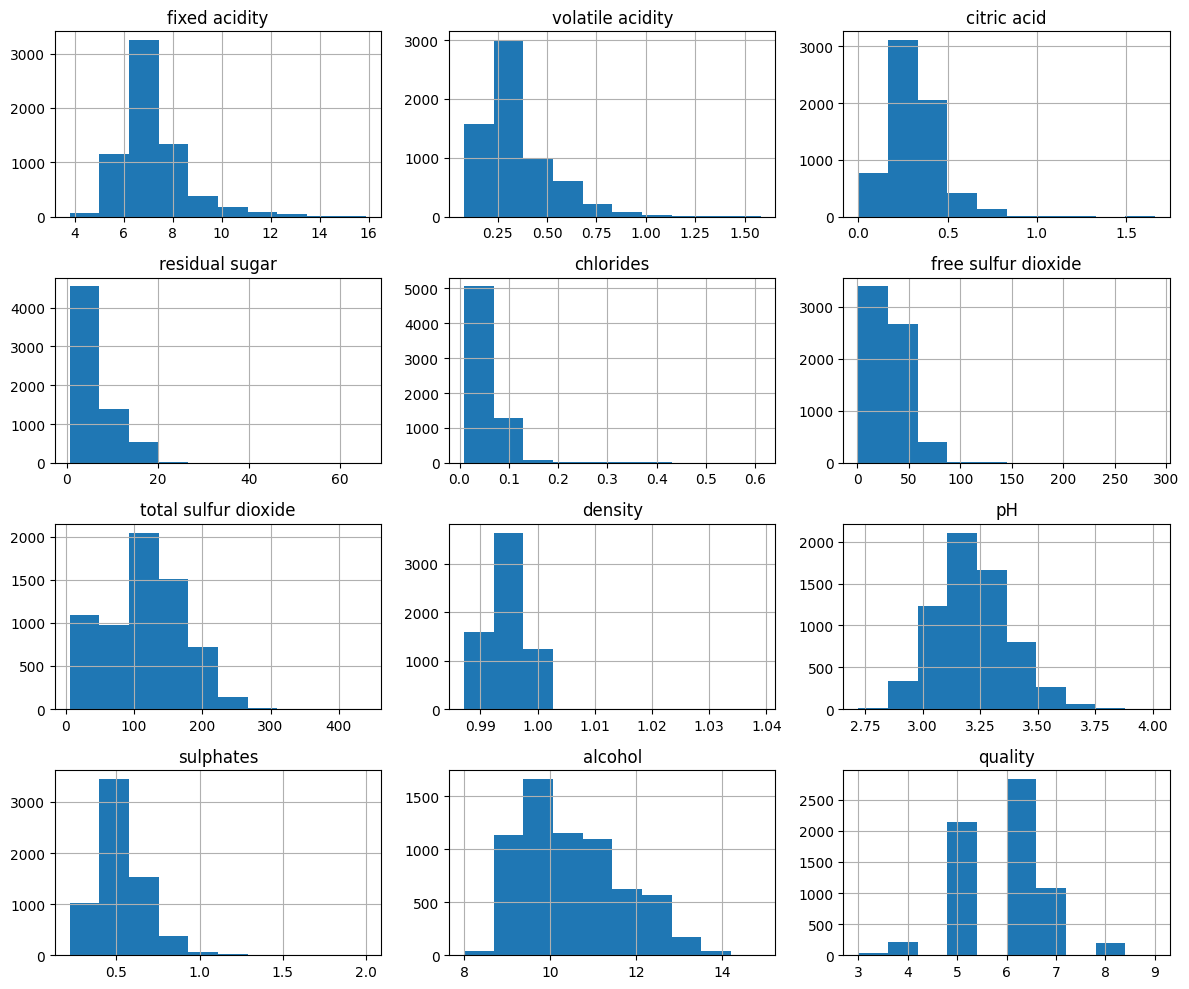

In [ ]:
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

Ραβδόγραμμα τις τιμές type του κρασιού

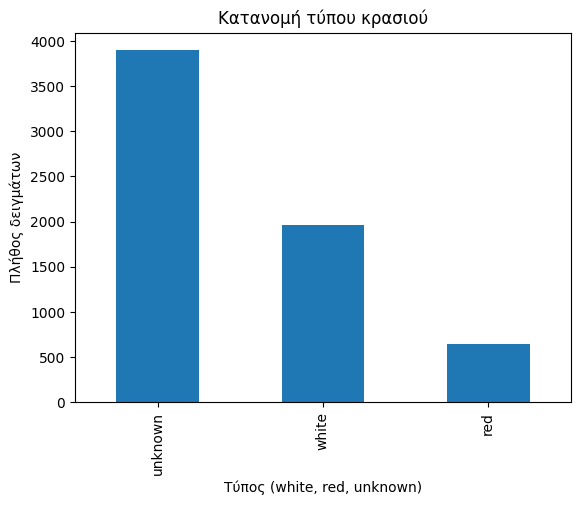

In [ ]:
df['type_filled'] = df['type'].fillna('unknown')
counts.plot(kind='bar')
plt.title("Κατανομή τύπου κρασιού")
plt.xlabel("Τύπος (white, red, unknown)")
plt.ylabel("Πλήθος δειγμάτων")
plt.show()

Ερώτημα 2 - Μετατροπή των white/red/unknown σε 0/1/2

In [ ]:
mapping = {
    'white': 0,
    'red': 1,
    'unknown': 2
}
df['type_num'] = df['type_filled'].map(mapping)
print(df['type_num'].value_counts())
x = df.drop(columns=['type', 'type_filled', 'type_num']).values
y = df['type_num'].values
print("Σχήμα x:", x.shape)
print("Σχήμα y:", y.shape)

type_num
2    3898
0    1959
1     640
Name: count, dtype: int64
Σχήμα x: (6497, 12)
Σχήμα y: (6497,)


Ερώτημα 3 - Δημιουργία δύο διαφορετικών συνόλων δεδομένων

In [ ]:
mask_known = (y != 2)
mask_unknown = (y == 2)
x_known = x[mask_known]
y_known = y[mask_known]
x_unknown = x[mask_unknown]

print("Σχήμα x_known:", x_known.shape)
print("Σχήμα y_known:", y_known.shape)
print("Σχήμα x_unknown:", x_unknown.shape)

Σχήμα x_known: (2599, 12)
Σχήμα y_known: (2599,)
Σχήμα x_unknown: (3898, 12)


Ερώτημα 4 - Χωρισμός του 1ου συνόλου δεδομένων σε train test 70-30

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x_known,
    y_known,
    test_size=0.30,
    random_state=42,
    stratify=y_known
)

print("Σχήμα x_train:", x_train.shape)
print("Σχήμα y_train:", y_train.shape)
print("Σχήμα x_test:", x_test.shape)
print("Σχήμα y_test:", y_test.shape)

Σχήμα x_train: (1819, 12)
Σχήμα y_train: (1819,)
Σχήμα x_test: (780, 12)
Σχήμα y_test: (780,)


Ερώτημα 5 - Εκπαίδευση Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

acc_train = accuracy_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train, average='weighted')
prec_train = precision_score(y_train, y_pred_train, average='weighted')
rec_train = recall_score(y_train, y_pred_train, average='weighted')

acc_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test, average='weighted')
prec_test = precision_score(y_test, y_pred_test, average='weighted')
rec_test = recall_score(y_test, y_pred_test, average='weighted')

print("TRAIN SET")
print("Accuracy:", acc_train)
print("F1-score:", f1_train)
print("Precision:", prec_train)
print("Recall:", rec_train)

print("\nTEST SET")
print("Accuracy:", acc_test)
print("F1-score:", f1_test)
print("Precision:", prec_test)
print("Recall:", rec_test)

TRAIN SET
Accuracy: 0.999450247388675
F1-score: 0.9994504535450379
Precision: 0.9994514717820188
Recall: 0.999450247388675

TEST SET
Accuracy: 0.9987179487179487
F1-score: 0.9987190681658766
Precision: 0.9987245914707055
Recall: 0.9987179487179487


Στο συγκεκριμένο dataset οι τύποι white και red δεν είναι ισορροπημένες. Για αυτό η Accuracy μπορεί να είναι παραπλανητική, καθώς επηρεάζεται πολύ από την πλειοψηφική κλάση. Η F1-score, που συνδυάζει ακρίβεια (precision) και τη δυνατότητα εντοπισμού όλων των κλάσεων (recall), αποτυπώνει καλύτερα την πραγματική απόδοση του μοντέλου και για τις δύο κλάσεις.

Ερώτημα 6 - Εκπαιδεύση Random Forest με random_state=42 στο train set

In [ ]:
rf_balanced = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_balanced.fit(x_train, y_train)

y_pred_train_bal = rf_balanced.predict(x_train)
y_pred_test_bal = rf_balanced.predict(x_test)

acc_train_bal = accuracy_score(y_train, y_pred_train_bal)
f1_train_bal = f1_score(y_train, y_pred_train_bal, average='weighted')
prec_train_bal = precision_score(y_train, y_pred_train_bal, average='weighted')
rec_train_bal = recall_score(y_train, y_pred_train_bal, average='weighted')

acc_test_bal = accuracy_score(y_test, y_pred_test_bal)
f1_test_bal = f1_score(y_test, y_pred_test_bal, average='weighted')
prec_test_bal = precision_score(y_test, y_pred_test_bal, average='weighted')
rec_test_bal = recall_score(y_test, y_pred_test_bal, average='weighted')

print("TRAIN SET Balanced")
print("Accuracy:", acc_train_bal)
print("F1-score:", f1_train_bal)
print("Precision:", prec_train_bal)
print("Recall:", rec_train_bal)

print("\nTEST SET Balanced")
print("Accuracy:", acc_test_bal)
print("F1-score:", f1_test_bal)
print("Precision:", prec_test_bal)
print("Recall:", rec_test_bal)

TRAIN SET Balanced
Accuracy: 0.999450247388675
F1-score: 0.9994504535450379
Precision: 0.9994514717820188
Recall: 0.999450247388675

TEST SET Balanced
Accuracy: 0.9948717948717949
F1-score: 0.9948627235660897
Precision: 0.9948713374047896
Recall: 0.9948717948717949


Η παράμετρος balanced στο RandomForestClassifier ρυθμίζει αυτόματα τα βάρη των κλάσεων έτσι ώστε κάθε κλάση να συμβάλλει εξίσου στη διαδικασία εκπαίδευσης, ανεξάρτητα από το πόσο συχνά εμφανίζεται στο dataset. Σύμφωνα με το documentation του scikit-learn, τα βάρη υπολογίζονται αντίστροφα ανάλογα με τη συχνότητα κάθε κλάσης στο training set. Έτσι οι μειοψηφικές κλάσεις λαμβάνουν μεγαλύτερο βάρος και οι πλειοψηφικές μικρότερο. Με αυτόν τον τρόπο το μοντέλο αποφεύγει να ευνοεί την πλειοψηφική κλάση και αντιμετωπίζει καλύτερα τα προβλήματα ανισορροπίας των κλάσεων, βελτιώνοντας την ικανότητά του να αναγνωρίζει και τις λιγότερο συχνές κατηγορίες.

Ερώτημα 7

In [ ]:
y_unknown_proba = rf_balanced.predict_proba(x_unknown)
print("Σχήμα πιθανοτήτων:", y_unknown_proba.shape)
print(y_unknown_proba[:10])

Σχήμα πιθανοτήτων: (3898, 2)
[[1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.95 0.05]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]]


ερώτημα 8 - Ανάθεση ετικετών

In [ ]:
proba_red = y_unknown_proba[:, 1]
proba_white = y_unknown_proba[:, 0]

y_unknown_pred = []

for p_red, p_white in zip(proba_red, proba_white):
    if p_red > 0.65:
        y_unknown_pred.append('red')
    elif p_red < 0.35:
        y_unknown_pred.append('white')
    else:
        y_unknown_pred.append('uncertain')

counts = pd.Series(y_unknown_pred).value_counts()
print(counts)

white        2939
red           908
uncertain      51
Name: count, dtype: int64


Ερώτημα 9 - Ένωση δεδομένων και επανεκπαίδευση

In [ ]:
y_unknown_pred = np.array(y_unknown_pred)
mask_confident = (y_unknown_pred == 'white') | (y_unknown_pred == 'red')

x_pseudo = x_unknown[mask_confident]
y_pseudo_str = y_unknown_pred[mask_confident]
label_map = {'white': 0, 'red': 1}
y_pseudo = np.array([label_map[l] for l in y_pseudo_str])
x_train_aug = np.vstack([x_train, x_pseudo])
y_train_aug = np.concatenate([y_train, y_pseudo])

print("Ενωμένο σχήμα x_train_aug:", x_train_aug.shape)
print("Ενωμένο σχήμα y_train_aug:", y_train_aug.shape)
rf_semi = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_semi.fit(x_train_aug, y_train_aug)

y_train_pred = rf_semi.predict(x_train)
y_test_pred  = rf_semi.predict(x_test)

acc_train = accuracy_score(y_train, y_train_pred)
acc_test  = accuracy_score(y_test,  y_test_pred)

print("Accuracy στο αρχικό train set:", acc_train)
print("Accuracy στο αρχικό test set :", acc_test)

Ενωμένο σχήμα x_train_aug: (5666, 12)
Ενωμένο σχήμα y_train_aug: (5666,)
Accuracy στο αρχικό train set: 0.999450247388675
Accuracy στο αρχικό test set : 0.9948717948717949


Ερώτημα 10

In [ ]:
x_train_loop = x_train.copy()
y_train_loop = y_train.copy()
x_unknown_loop = x_unknown.copy()

label_map_inv = {0: 'white', 1: 'red'}

high_threshold = 0.65
low_threshold = 0.35

iteration = 1

while x_unknown_loop.shape[0] > 0:
    print(f"\nΕπανάληψη {iteration}")

    rf_loop = RandomForestClassifier(random_state=42, class_weight='balanced')
    rf_loop.fit(x_train_loop, y_train_loop)

    y_unknown_proba = rf_loop.predict_proba(x_unknown_loop)
    proba_red = y_unknown_proba[:, 1]

    mask_red = proba_red > high_threshold
    mask_white = proba_red < low_threshold
    mask_labeled = mask_red | mask_white

    if np.sum(mask_labeled) == 0:
        print("Τερματισμός: δεν υπάρχουν άλλα δείγματα υψηλής εμπιστοσύνης.")
        break

    y_new = np.array([1 if p else 0 for p in mask_red[mask_labeled]])
    x_new = x_unknown_loop[mask_labeled]

    x_train_loop = np.vstack([x_train_loop, x_new])
    y_train_loop = np.concatenate([y_train_loop, y_new])

    x_unknown_loop = x_unknown_loop[~mask_labeled]

    y_pred_train = rf_loop.predict(x_train)
    y_pred_test = rf_loop.predict(x_test)

    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    f1_train = f1_score(y_train, y_pred_train, average='weighted')
    f1_test = f1_score(y_test, y_pred_test, average='weighted')
    prec_train = precision_score(y_train, y_pred_train, average='weighted')
    prec_test = precision_score(y_test, y_pred_test, average='weighted')
    rec_train = recall_score(y_train, y_pred_train, average='weighted')
    rec_test = recall_score(y_test, y_pred_test, average='weighted')

    print(f"Προστέθηκαν {np.sum(mask_labeled)} νέα δείγματα στο σύνολο εκπαίδευσης.")
    print(f"Ακρίβεια Εκπαίδευσης: {acc_train:.4f}, Ακρίβεια Test: {acc_test:.4f}")

    iteration += 1

print("\nΤελικό Μέγεθος Συνόλου Εκπαίδευσης:")
print("x_train_loop:", x_train_loop.shape)
print("y_train_loop:", y_train_loop.shape)
print("Άγνωστα δείγματα που μας έμειναν:", x_unknown_loop.shape[0])


Επανάληψη 1
Προστέθηκαν 3847 νέα δείγματα στο σύνολο εκπαίδευσης.
Ακρίβεια Εκπαίδευσης: 0.9995, Ακρίβεια Test: 0.9949

Επανάληψη 2
Προστέθηκαν 23 νέα δείγματα στο σύνολο εκπαίδευσης.
Ακρίβεια Εκπαίδευσης: 0.9995, Ακρίβεια Test: 0.9949

Επανάληψη 3
Προστέθηκαν 2 νέα δείγματα στο σύνολο εκπαίδευσης.
Ακρίβεια Εκπαίδευσης: 0.9995, Ακρίβεια Test: 0.9962

Επανάληψη 4
Προστέθηκαν 5 νέα δείγματα στο σύνολο εκπαίδευσης.
Ακρίβεια Εκπαίδευσης: 0.9995, Ακρίβεια Test: 0.9962

Επανάληψη 5
Προστέθηκαν 1 νέα δείγματα στο σύνολο εκπαίδευσης.
Ακρίβεια Εκπαίδευσης: 0.9995, Ακρίβεια Test: 0.9974

Επανάληψη 6
Τερματισμός: δεν υπάρχουν άλλα δείγματα υψηλής εμπιστοσύνης.

Τελικό Μέγεθος Συνόλου Εκπαίδευσης:
x_train_loop: (5697, 12)
y_train_loop: (5697,)
Άγνωστα δείγματα που μας έμειναν: 20


#**Μέρος 2**

Ερώτημα 1

In [ ]:
df_full = pd.read_csv("wine-full.csv")
df_full

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Κατανομή quality (counts):
quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: count, dtype: int64

Κατανομή quality (ποσοστά):
quality
3    0.004618
4    0.033246
5    0.329075
6    0.436509
7    0.166077
8    0.029706
9    0.000770
Name: proportion, dtype: float64


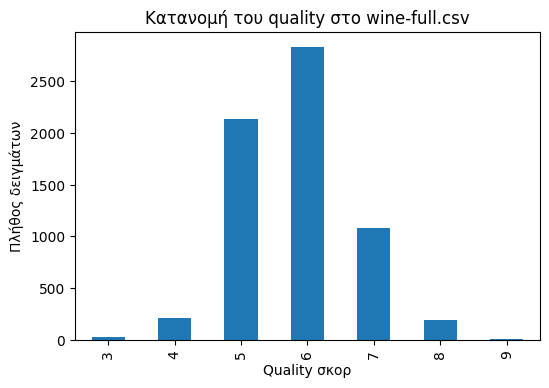

In [ ]:
print("Κατανομή quality (counts):")
print(df_full["quality"].value_counts().sort_index())


print("\nΚατανομή quality (ποσοστά):")
print(df_full["quality"].value_counts(normalize=True).sort_index())


plt.figure(figsize=(6,4))
df_full["quality"].value_counts().sort_index().plot(kind="bar")
plt.title("Κατανομή του quality στο wine-full.csv")
plt.xlabel("Quality σκορ")
plt.ylabel("Πλήθος δειγμάτων")
plt.show()

Η μεταβλητή quality δεν είναι ισορροπημένη, επειδή οι κλάσεις εμφανίζονται με πολύ διαφορετικές συχνότητες. Από το ραβδόγραμμα φαίνεται ότι οι τιμές 5 και 6 συγκεντρώνουν πάνω από το 75% των δειγμάτων, ενώ οι τιμές όπως το 3, το 8 και το 9, εμφανίζονται ελάχιστες φορές. Για να θεωρειθεί balanced μια κατανομή, οι κλάσεις θα πρέπει να έχουν περίπου παρόμοιο πλήθος δειγμάτων.

Ερώτημα 2

Στατιστικά

In [ ]:
df_full.groupby('type')['quality'].mean()
print("Μέση ποιότητα ανά τύπο:\n",df_full.groupby('type')['quality'].mean())
df_full.groupby('type')['quality'].median()
print("Διάμεσος ποιότητας ανά τύπο:\n",df_full.groupby('type')['quality'].median())
df_full.groupby('type')['quality'].std()
print("Τυπική απόκλιση ποιότητας ανά τύπο:\n",df_full.groupby('type')['quality'].std())
df_full.groupby('type')['quality'].agg(['min','max'])
print("Ελάχιστη και μέγιστη τιμή ποιότητας ανά τύπο:\n",df_full.groupby('type')['quality'].agg(['min','max']))
df_full['type'].value_counts()
print("Πλήθος δειγμάτων ανά τύπο:\n",df_full['type'].value_counts())

Μέση ποιότητα ανά τύπο:
 type
red      5.636023
white    5.877909
Name: quality, dtype: float64
Διάμεσος ποιότητας ανά τύπο:
 type
red      6.0
white    6.0
Name: quality, dtype: float64
Τυπική απόκλιση ποιότητας ανά τύπο:
 type
red      0.807569
white    0.885639
Name: quality, dtype: float64
Ελάχιστη και μέγιστη τιμή ποιότητας ανά τύπο:
        min  max
type           
red      3    8
white    3    9
Πλήθος δειγμάτων ανά τύπο:
 type
white    4898
red      1599
Name: count, dtype: int64


<Figure size 600x400 with 0 Axes>

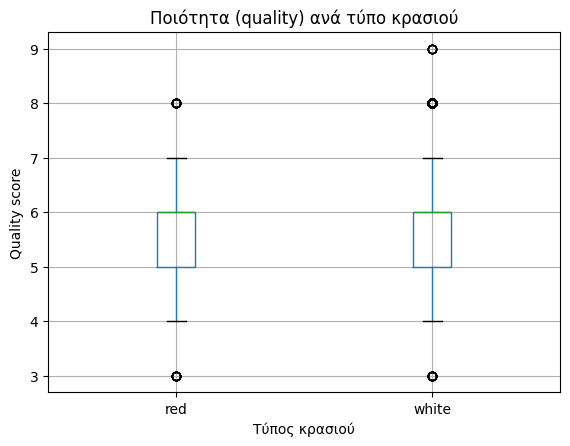

In [ ]:
stats_by_type = df_full.groupby("type")["quality"].agg(["count", "mean", "std", "median"])
plt.figure(figsize=(6,4))
df_full.boxplot(column="quality", by="type")
plt.title("Ποιότητα (quality) ανά τύπο κρασιού")
plt.suptitle("")
plt.xlabel("Τύπος κρασιού")
plt.ylabel("Quality score")
plt.show()

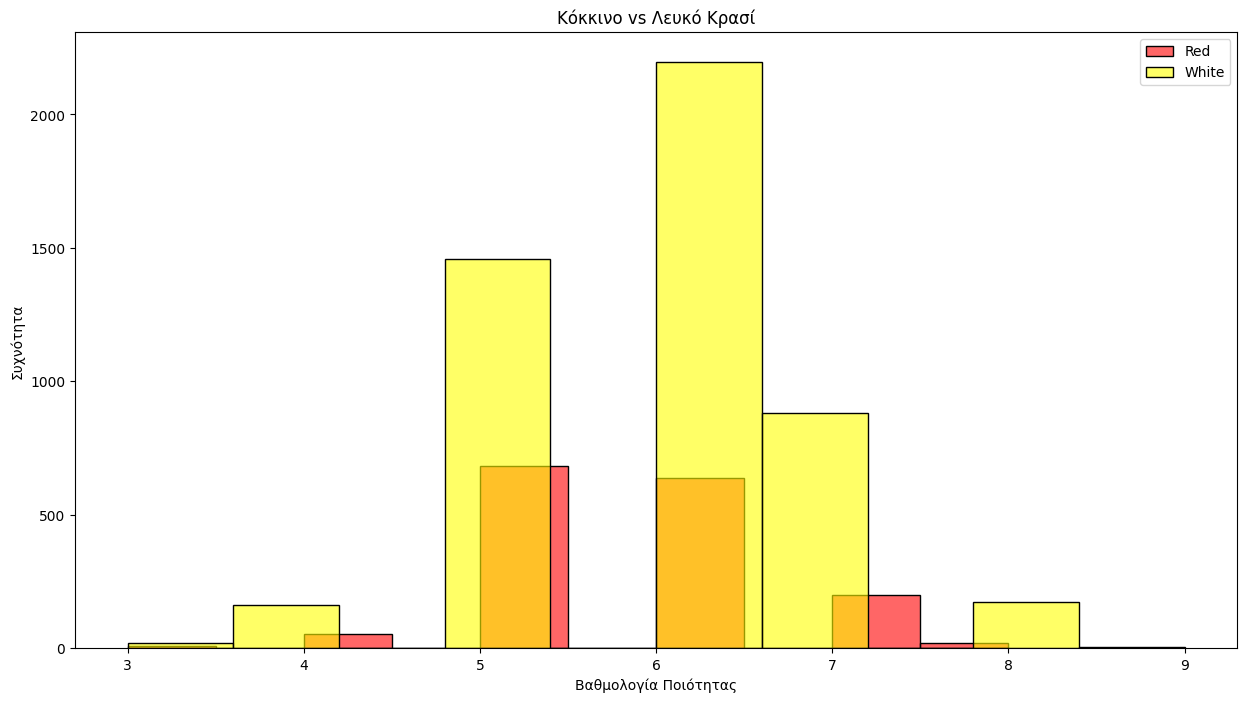

In [ ]:
plt.figure(figsize=(15,8))

sns.histplot(data=df_full[df_full['type']=='red'], x='quality', color='red', label='Red', kde=False, bins=10, alpha=0.6)
sns.histplot(data=df_full[df_full['type']=='white'], x='quality', color='yellow', label='White', kde=False, bins=10, alpha=0.6)

plt.title("Κόκκινο vs Λευκό Κρασί")
plt.xlabel("Βαθμολογία Ποιότητας")
plt.ylabel("Συχνότητα")
plt.legend()
plt.show()

Από την ανάλυση προκύπτει ότι τα λευκά κρασιά παρουσιάζουν ελαφρώς υψηλότερη μέση ποιότητα (5.88 έναντι 5.64), ενώ η διάμεσος ποιότητας είναι ίδια και για τους δύο τύπους. Η τυπική απόκλιση είναι παρόμοια με τα λευκά να εμφανίζουν λίγο μεγαλύτερη μεταβλητότητα στην ποιότητα (0.88 έναντι 0.81). Στα ελάχιστα και μέγιστα σκορ τα λευκά κρασιά φτάνουν μέχρι ποιότητα 9, ενώ τα κόκκινα έως 8. Τέλος στο σύνολο δεδομένων τα λευκά κρασιά είναι περισσότερα (4898 δείγματα) σε σχέση με τα κόκκινα (1599 δείγματα), γεγονός που εξηγεί και την ομαλότερη κατανομή τους.

Ερώτημα 3

In [ ]:
ξηρά = df_full[df_full['residual sugar'] < 4]['quality']
γλυκά = df_full[df_full['residual sugar'] >= 4]['quality']

mean_dry = ξηρά.mean()
mean_sweet = γλυκά.mean()
std_dry = ξηρά.std()
std_sweet = γλυκά.std()
count_dry = len(ξηρά)
count_sweet = len(γλυκά)

print("ΣΥΓΚΡΙΣΗ ΠΟΙΟΤΗΤΑΣ ΞΗΡΩΝ vs ΓΛΥΚΩΝ ΚΡΑΣΙΩΝ")
print(f"Ξηρά κρασιά (residual sugar < 4 g/L):")
print(f"  - Μέση ποιότητα: {mean_dry:.3f}")
print(f"  - Τυπική απόκλιση: {std_dry:.3f}")
print(f"  - Πλήθος δειγμάτων: {count_dry}")
print(f"Γλυκά κρασιά (residual sugar ≥ 4 g/L):")
print(f"  - Μέση ποιότητα: {mean_sweet:.3f}")
print(f"  - Τυπική απόκλιση: {std_sweet:.3f}")
print(f"  - Πλήθος δειγμάτων: {count_sweet}")

if mean_sweet > mean_dry:
    print("Τα γλυκά κρασιά έχουν υψηλότερη μέση ποιότητα")
    difference = mean_sweet - mean_dry
    print(f"   Διαφορά: +{difference:.3f} μονάδες")
elif mean_dry > mean_sweet:
    print("Τα ξηρά κρασιά έχουν υψηλότερη μέση ποιότητα")
    difference = mean_dry - mean_sweet
    print(f"   Διαφορά: +{difference:.3f} μονάδες")
else:
    print("Τα δύο τύποι έχουν ίδια μέση ποιότητα")

from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(ξηρά, γλυκά, nan_policy='omit')
print(f"\nΣτατιστική Σημαντικότητα:")
print(f"p-value: {p_value:.4f}")
if p_value < 0.05:
    print("Η διαφορά είναι στατιστικά σημαντική (p < 0.05)")
else:
    print("Η διαφορά ΔΕΝ είναι στατιστικά σημαντική (p ≥ 0.05)")

ΣΥΓΚΡΙΣΗ ΠΟΙΟΤΗΤΑΣ ΞΗΡΩΝ vs ΓΛΥΚΩΝ ΚΡΑΣΙΩΝ
Ξηρά κρασιά (residual sugar < 4 g/L):
  - Μέση ποιότητα: 5.819
  - Τυπική απόκλιση: 0.884
  - Πλήθος δειγμάτων: 3539
Γλυκά κρασιά (residual sugar ≥ 4 g/L):
  - Μέση ποιότητα: 5.818
  - Τυπική απόκλιση: 0.861
  - Πλήθος δειγμάτων: 2956
Τα ξηρά κρασιά έχουν υψηλότερη μέση ποιότητα
   Διαφορά: +0.001 μονάδες

Στατιστική Σημαντικότητα:
p-value: 0.9658
Η διαφορά ΔΕΝ είναι στατιστικά σημαντική (p ≥ 0.05)


Με βάση την στατιστική ανάλυση δεν παρατηρείται στατιστικά σημαντική διαφορά στην ποιότητα μεταξύ ξηρών και γλυκών κρασιών. Η μέση τιμή της ποιότητας είναι σχεδόν πανομοιότυπη, με ελάχιστη διαφορά μόλις 0.001. Αυτό υποδηλώνει ότι η ποσότητα των υπολειπόμενων σακχάρων δεν επηρεάζει την ποιότητα του κρασιού.

Ερώτημα 4

In [ ]:
df_full['type'] = df_full['type'].map({'white': 0, 'red': 1})

x = df_full.drop(columns=['quality']).values
y = df_full['quality'].values

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.10, random_state=0
)

print("x_train:", x_train.shape)
print("x_test:", x_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

x_train: (5847, 12)
x_test: (650, 12)
y_train: (5847,)
y_test: (650,)


Ερώτημα 5

In [ ]:
dt_reg = DecisionTreeRegressor(random_state=0)
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
y_pred = dt_reg.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
print("Μέσο Απόλυτο Σφάλμα (MAE) στο σύνολο ελέγχου:", mae)

Μέσο Απόλυτο Σφάλμα (MAE) στο σύνολο ελέγχου: 0.44769230769230767


Ερώτημα 6

In [ ]:
mae_list = []

for seed in range(10):
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.10, random_state=seed
    )

    dt_reg = DecisionTreeRegressor(random_state=0)
    dt_reg.fit(x_train, y_train)

    y_pred = dt_reg.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)

    mae_list.append(mae)

mae_array = np.array(mae_list)

mean_mae = mae_array.mean()
std_mae = mae_array.std()

print("Μέσος Όρος MAE:", mean_mae)
print("Τυπική Απόκλιση MAE:", std_mae)

Μέσος Όρος MAE: 0.4661538461538462
Τυπική Απόκλιση MAE: 0.026832815729997475


Ο μέσος όρος του MAE μας δείχνει πόσο λάθος κάνει το μοντέλο κατά μέσο όρο στις προβλέψεις του. Η τυπική απόκλιση δείχνει πόσο σταθερό είναι αυτό το σφάλμα όταν αλλάζει ο διαχωρισμός του train–test. Μικρή τυπική απόκλιση σημαίνει ότι το μοντέλο είναι πιο σταθερό και προβλέψιμο, ενώ μεγάλη σημαίνει ότι η απόδοσή του μεταβάλλεται αρκετά. Ο συνδυασμός των δύο μας δίνει μια πιο αξιόπιστη εικόνα για το αναμενόμενο σφάλμα του μοντέλου.

Ερώτημα 7

Χωρίζουμε τα δεδομένα

In [ ]:
x_train_final, x_val, y_train_final, y_val = train_test_split(
    x_train, y_train, test_size=0.20, random_state=0
)

print("Train final:", x_train_final.shape)
print("Validation:", x_val.shape)
print("Test:", x_test.shape)

Train final: (4677, 12)
Validation: (1170, 12)
Test: (650, 12)


Βρίσκουμε 15 τυχαίους συνδιασμούς και υπολογίζουμε MAE

In [ ]:
param_grid = [
    {"max_depth": d, "min_samples_split": s, "min_samples_leaf": l}
    for d, s, l in [
        (None, 2, 1), (5, 2, 1), (10, 2, 1),
        (5, 5, 1),   (10, 5, 1), (10, 5, 1),
        (5, 2, 2),   (15, 2, 2), (15, 2, 2),
        (5, 4, 2),   (10, 4, 2), (15, 4, 2),
        (20, 2, 1),  (20, 4, 2), (None, 4, 2)
    ]
]

results = []

for params in param_grid:
    model = DecisionTreeRegressor(
        random_state=0,
        max_depth=params["max_depth"],
        min_samples_split=params["min_samples_split"],
        min_samples_leaf=params["min_samples_leaf"]
    )

    model.fit(x_train_final, y_train_final)

    y_train_pred = model.predict(x_train_final)
    y_val_pred   = model.predict(x_val)

    mae_train = mean_absolute_error(y_train_final, y_train_pred)
    mae_val   = mean_absolute_error(y_val, y_val_pred)

    results.append((params, mae_train, mae_val))

for i, (params, train_mae, val_mae) in enumerate(results, start=1):
    print(f"Model {i}: {params}")
    print(f"  Train MAE: {train_mae:.4f}")
    print(f"  Val MAE:   {val_mae:.4f}\n")

Model 1: {'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}
  Train MAE: 0.0002
  Val MAE:   0.5068

Model 2: {'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1}
  Train MAE: 0.5460
  Val MAE:   0.5999

Model 3: {'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1}
  Train MAE: 0.3512
  Val MAE:   0.5504

Model 4: {'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 1}
  Train MAE: 0.5460
  Val MAE:   0.5999

Model 5: {'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 1}
  Train MAE: 0.3604
  Val MAE:   0.5619

Model 6: {'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 1}
  Train MAE: 0.3604
  Val MAE:   0.5619

Model 7: {'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 2}
  Train MAE: 0.5451
  Val MAE:   0.5996

Model 8: {'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 2}
  Train MAE: 0.1613
  Val MAE:   0.5431

Model 9: {'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 2}
  Train

Ερώτημα 8

Για την επιλογή υπερπαραμέτρων το validation set είναι πιο αξιόπιστο από το training set. Το training set χρησιμοποιείται για να εκπαιδεύσει το μοντέλο και αν αξιολογήσουμε τις επιλογές μας πάνω σε αυτό, η απόδοση θα φανεί υπερβολικά καλή (overfit). Αντίθετα το validation set αποτελείται από δεδομένα που δεν χρησιμοποιούνται στην εκπαίδευση, επομένως δίνει μια πιο ρεαλιστική εκτίμηση της γενίκευσης του μοντέλου και επιτρέπει σωστή σύγκριση των υπερπαραμέτρων.

Ερώτημα 9

In [ ]:
model = DecisionTreeRegressor(random_state=0)
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 4, 6, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=10,
    n_jobs=-1
)
grid_search.fit(x_train, y_train)

print("Καλύτερες υπερπαράμετροι:", grid_search.best_params_)
print("Καλύτερο MAE με βάση την επικύρωση:", -grid_search.best_score_)


Καλύτερες υπερπαράμετροι: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Καλύτερο MAE με βάση την επικύρωση: 0.48452201147406626


Ερώτημα 10

In [ ]:
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(x_test)

test_mae = mean_absolute_error(y_test, y_pred_test)

print("MAE του καλύτερου μοντέλου στο σύνολο ελέγχου:", test_mae)

MAE του καλύτερου μοντέλου στο σύνολο ελέγχου: 0.4846153846153846


Από τις τρεις μεθοδολογίες η πιο αξιόπιστη είναι το cross validation προσέγγιση του ερωτήματος 9 και αυτό γιατί στο ερώτημα 6 το train test split γίνεται μία μόνο φορά και επομένως επηρεάζεται έντονα από το πώς έτυχε να χωριστούν τα δεδομένα. Στο ερώτημα 7 χρησιμοποιείται ένα σταθερό validation set το οποίο μπορεί να μην είναι πλήρως αντιπροσωπευτικό. Στο Ερώτημα 9 όμως το cross validation χωρίζει το training set σε πολλά διαφορετικά train validation splits και υπολογίζει τον μέσο όρο του σφάλματος, μειώνοντας σημαντικά την επίδραση της τυχαιότητας και προσφέροντας πιο σταθερή εκτίμηση της απόδοσης του μοντέλου

Ερώτημα 11

In [28]:
grid_params = {
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

dtr = DecisionTreeRegressor(random_state=0)

grid_search_fixed = GridSearchCV(
    estimator=dtr,
    param_grid=grid_params,
    scoring='neg_mean_absolute_error',
    cv=10,
    n_jobs=-1
)

grid_search_fixed.fit(x_train, y_train)
print("Καλύτεροι υπερπαραμέτροι:", grid_search_fixed.best_params_)
best_tree = grid_search_fixed.best_estimator_

Καλύτεροι υπερπαραμέτροι: {'min_samples_leaf': 1, 'min_samples_split': 2}


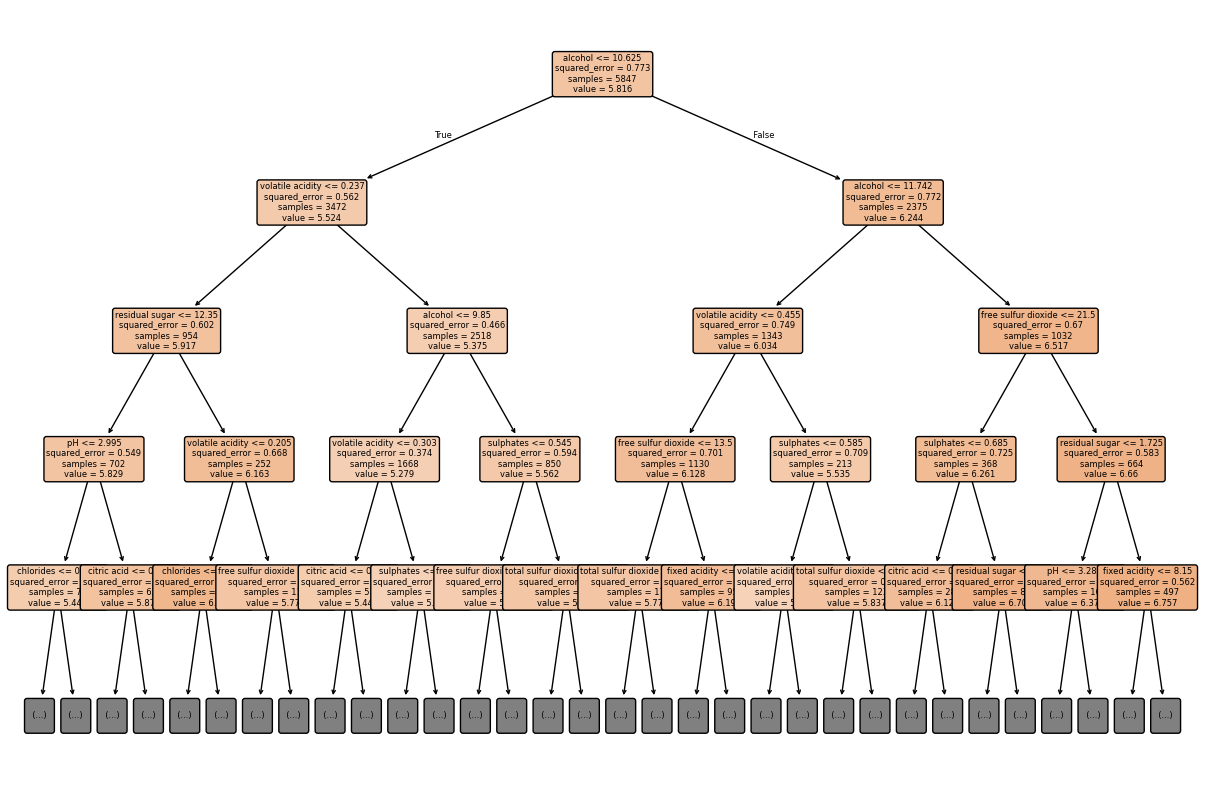

In [33]:
plt.figure(figsize=(15, 10))
plot_tree(best_tree,
          feature_names=df_full.drop(columns=['quality']).columns,
          filled=True,
          rounded=True,
          fontsize=6,
          max_depth=4)
plt.show()

Το δέντρο απόφασης δείχνει ότι ο σημαντικότερος παράγοντας για την ποιότητα του κρασιού είναι το ποσοστό αλκοόλ. Κρασιά με πάνω από 10.5% αλκοόλ τείνουν να έχουν υψηλότερη ποιότητα. Σε κρασιά με χαμηλότερο αλκοόλ η volatile acidity επηρεάζει έντονα το αποτέλεσμα (Γενικά χαμηλές τιμές σχετίζονται με καλύτερη ποιότητα). Η residual sugar διαφοροποιεί επίσης την ποιότητα με μέτρια επίπεδα να βοηθούν και πολύ υψηλές τιμές να τη μειώνουν. Για κρασιά με υψηλό αλκοόλ, η χαμηλή οξύτητα, το χαμηλό free sulfur dioxide και τα υψηλότερα sulphates οδηγούν σε καλύτερες προβλέψεις ποιότητας. Συνολικά, κρασιά με υψηλό αλκοόλ, χαμηλή οξύτητα, ισορροπημένη γλυκύτητα, χαμηλό free SO₂ και αρκετά sulphates τείνουν να αξιολογούνται ως υψηλότερης ποιότητας.

Ραβδόγραμμα για κάθε χαρακτηριστικό

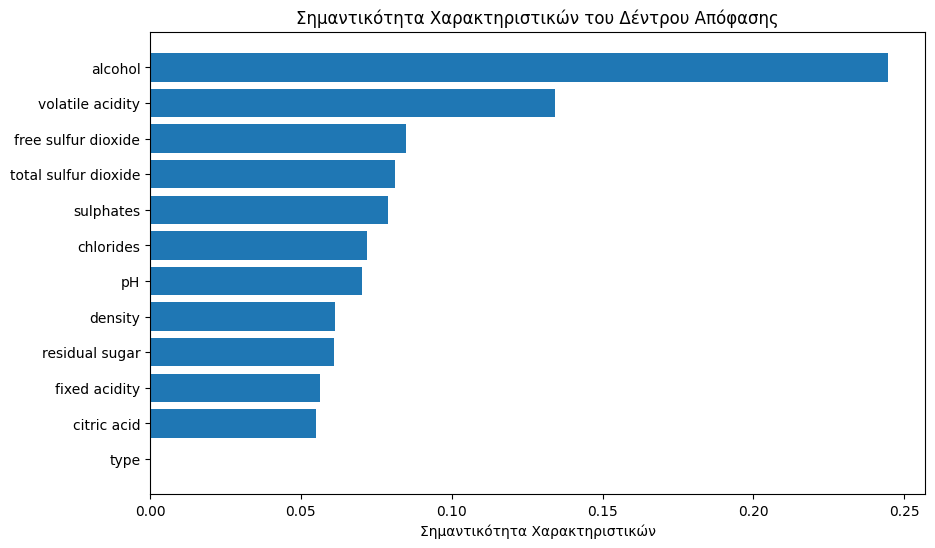

In [36]:
importances = best_tree.feature_importances_
feature_names = df_full.drop(columns=['quality']).columns

sorted_idx = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], importances[sorted_idx])
plt.xlabel("Σημαντικότητα Χαρακτηριστικών")
plt.title("Σημαντικότητα Χαρακτηριστικών του Δέντρου Απόφασης")
plt.show()